In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import ipywidgets as widgets
from ipywidgets.widgets.interaction import interact
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io
import os

 # Use interactive matplotlib backend, which runs in the browser
%matplotlib notebook

In [4]:
def make_plot():
    global msg
    figsize = plt.figaspect(1/2)
    #fig, ax = plt.subplots(1, 2, figsize=figsize)
    
    fig = plt.figure(figsize=figsize);
    ax = [None, None]
    ax[0] = fig.add_subplot(121)
    ax[1] = fig.add_subplot(122, projection='polar')
    #ax[1] = fig.add_subplot(122)

    
    # Draw an empty image
    img_view = ax[0].imshow(np.zeros((1,1)), cmap='jet', origin='lower')
    
    # Add a nice color bar
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    # Add an empty plot of the SH coefficients
    plot_view = ax[1].plot(np.zeros((1)))[0]
    #ax[1].set_aspect('scaled')
    #plt.axis('scaled')
    ax[1].set(adjustable="datalim")
    ax[1].set_rmax(1)
    ax[1].set_rticks([0.5, 1])  # less radial ticks
    
    result = { 'img_view' : img_view,
               'img_ax' : ax[0],
               'plot_view' : plot_view,
               'plot_ax' : ax[1] }
    
    def on_click(event):
        global msg
        if event.inaxes is not ax[0] or 'on_click_handler' not in result:
            return
        #f = open("c:/projects/epfl/epfl17/python/test.out", "w")
        #f.write("{} {}".format(event.xdata, event.ydata))
        #f.close()

        #result['on_click_handler'](np.uint32([event.ydata, event.xdata]))
        result['on_click_handler'](np.array([event.ydata, event.xdata]))

    fig.canvas.mpl_connect('button_press_event', on_click)
    fig.tight_layout()

    return result

def plot_interact(plot):
    #def redraw(slice_index, coeff_index, dataset_index):
    def redraw(coeff_index):
        img_view = plot['img_view']
        plot_view = plot['plot_view']
        plot_ax = plot['plot_ax']
            
        # Extract a slice
        #data = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/debug_terms/data_term1.mat")
        #term_index = 1
        #x_term = data["x_term{}".format(term_index)].reshape(data["x_term{}".format(term_index)].shape[0])
        #A = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/debug_terms/system_{}_term{}.mat".format(id, 1))["A"]
        #u = get_coefficient_field(x_real, pnb, coeff_index )
        #print( "min={} max={}".format(np.min(u), np.max(u)) )

        
        # Update the plot
        #img_view.set_data(u.T)
        #img_view.set_clim(vmin=0, vmax=np.percentile(data_slice, 99))
        #img_view.set_clim(vmin=np.min(u), vmax=np.max(u))
        #img_view.set_extent((0, data_slice.shape[0], 0, data_slice.shape[1]))
        #img_view.set_extent((pnb.domain.bound_min[0], pnb.domain.bound_max[0], pnb.domain.bound_min[1], pnb.domain.bound_max[1]))
        
        def on_click_handler(pos):
            #pos2 = np.array([pos[1], pos[0]])
            #pos2 = np.array([3.5, 2.0])
            #pos2 = np.array([2.0, 3.5])
            #L = problem["L"]
            
            plot_y = np.arange(0, 2, 0.01)
            plot_x = 2 * np.pi * plot_y
            
            for i in range(plot_x.shape[0]):
                phi = plot_x[i]
                omega = shtools.sphericalDirection(np.pi*0.5, phi)
                #plot_y[i] = L(np.array([pos[1], pos[0]]), omega)
            
            plot_y = plot_y/np.max(plot_y)
            plot_view.set_data(plot_x, plot_y)
            #plot_view.set_rmax(2)
        
        plot['on_click_handler'] = on_click_handler

    #slice_index_widget = widgets.IntSlider(
    #    min=0,
    #    max=127,
    #    value=64,
    #    description='Slice'
    #)
   
    coeff_index_widget = widgets.IntSlider(
        min=0,
        max=2,
        value=0,
        description='coefficient'
    )
    
    #dataset_index_widget = widgets.Dropdown(
    #    options=[('P1 solution', 0), ('P2 solution', 1)],
    #    value=0,
    #    description='Dataset'
    #)
    
    #interact(redraw, dataset_index=dataset_index_widget, slice_index=slice_index_widget, coeff_index=coeff_index_widget)
    interact(redraw, coeff_index=coeff_index_widget)

<IPython.core.display.Javascript object>


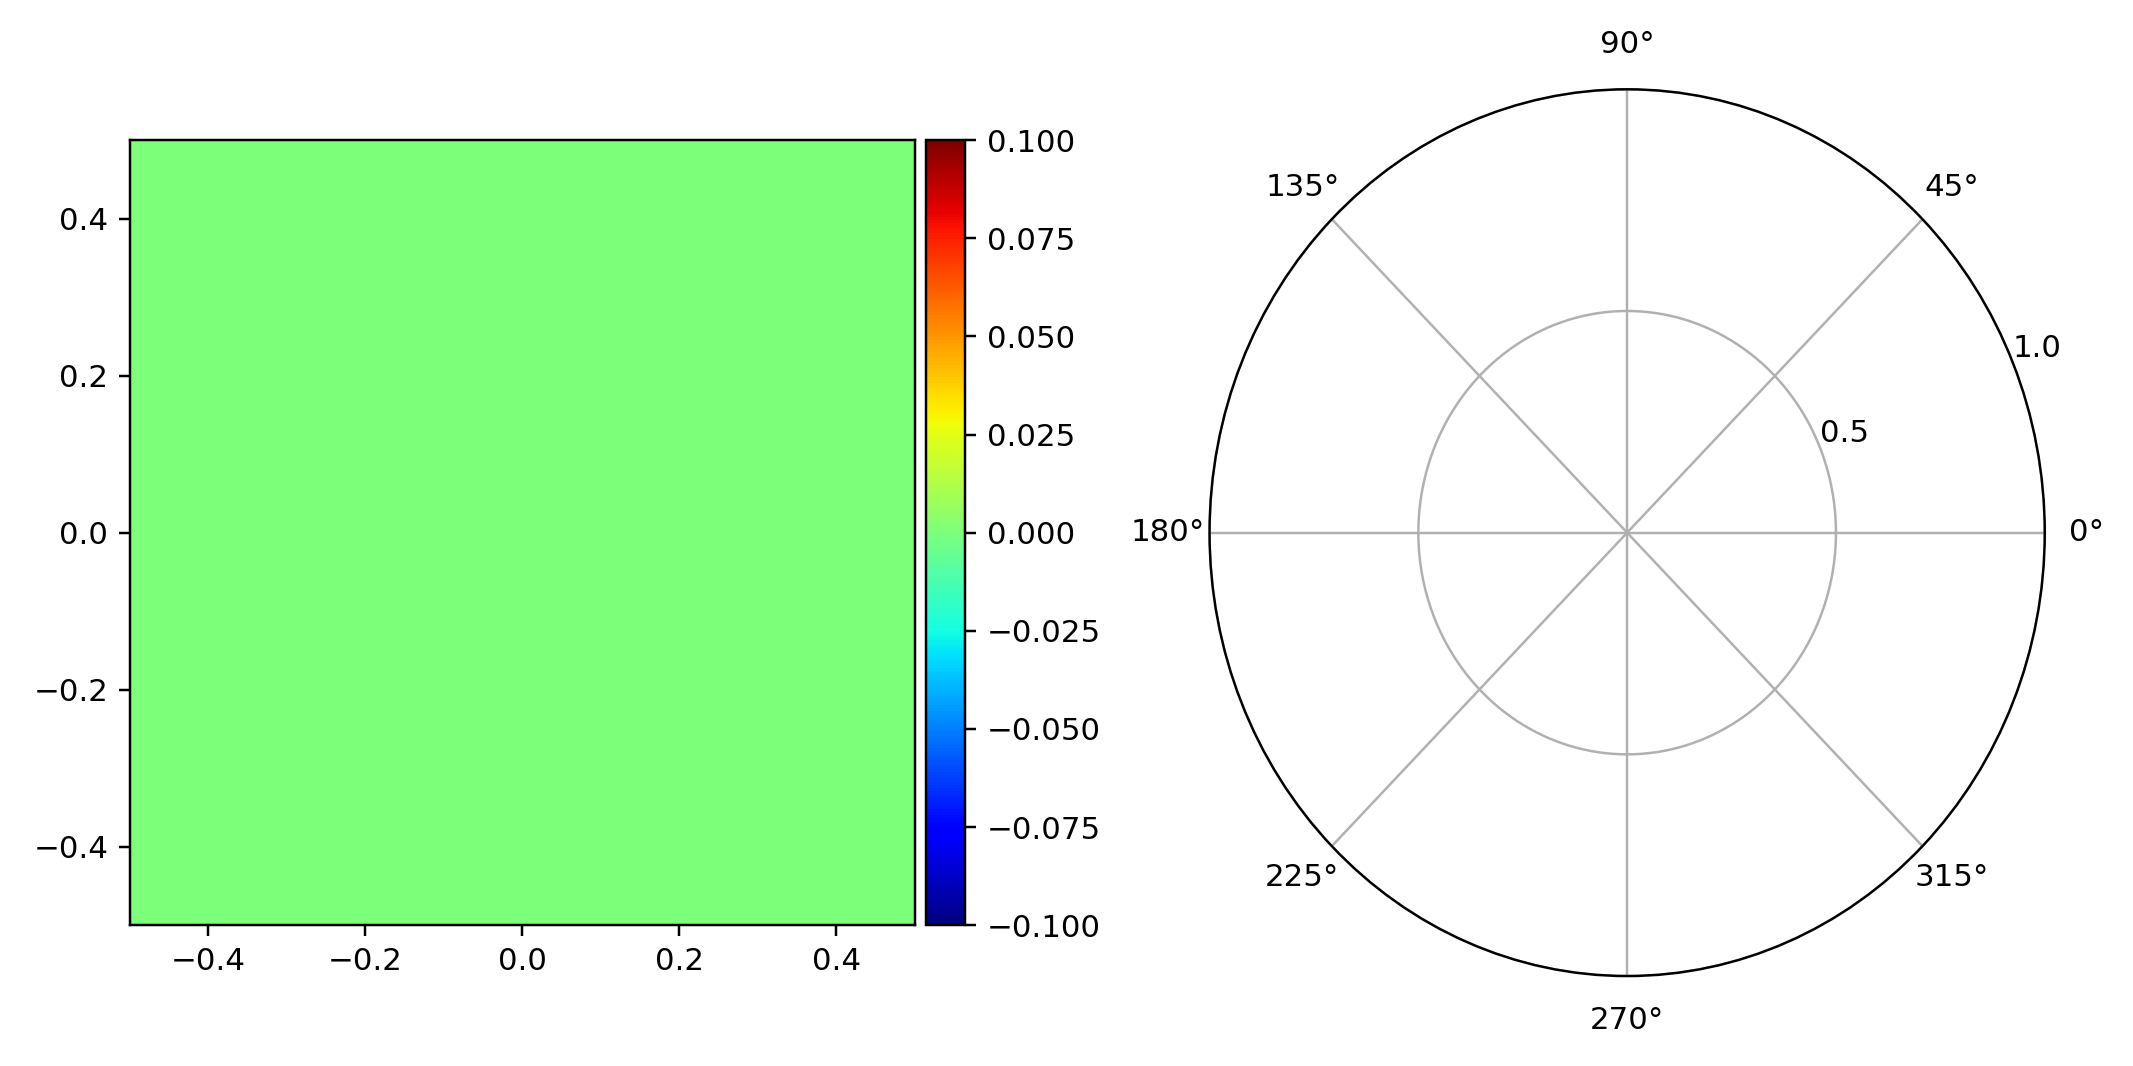

In [5]:
plot = make_plot()

In [6]:
plot_interact(plot)

<IPython.core.display.Javascript object>


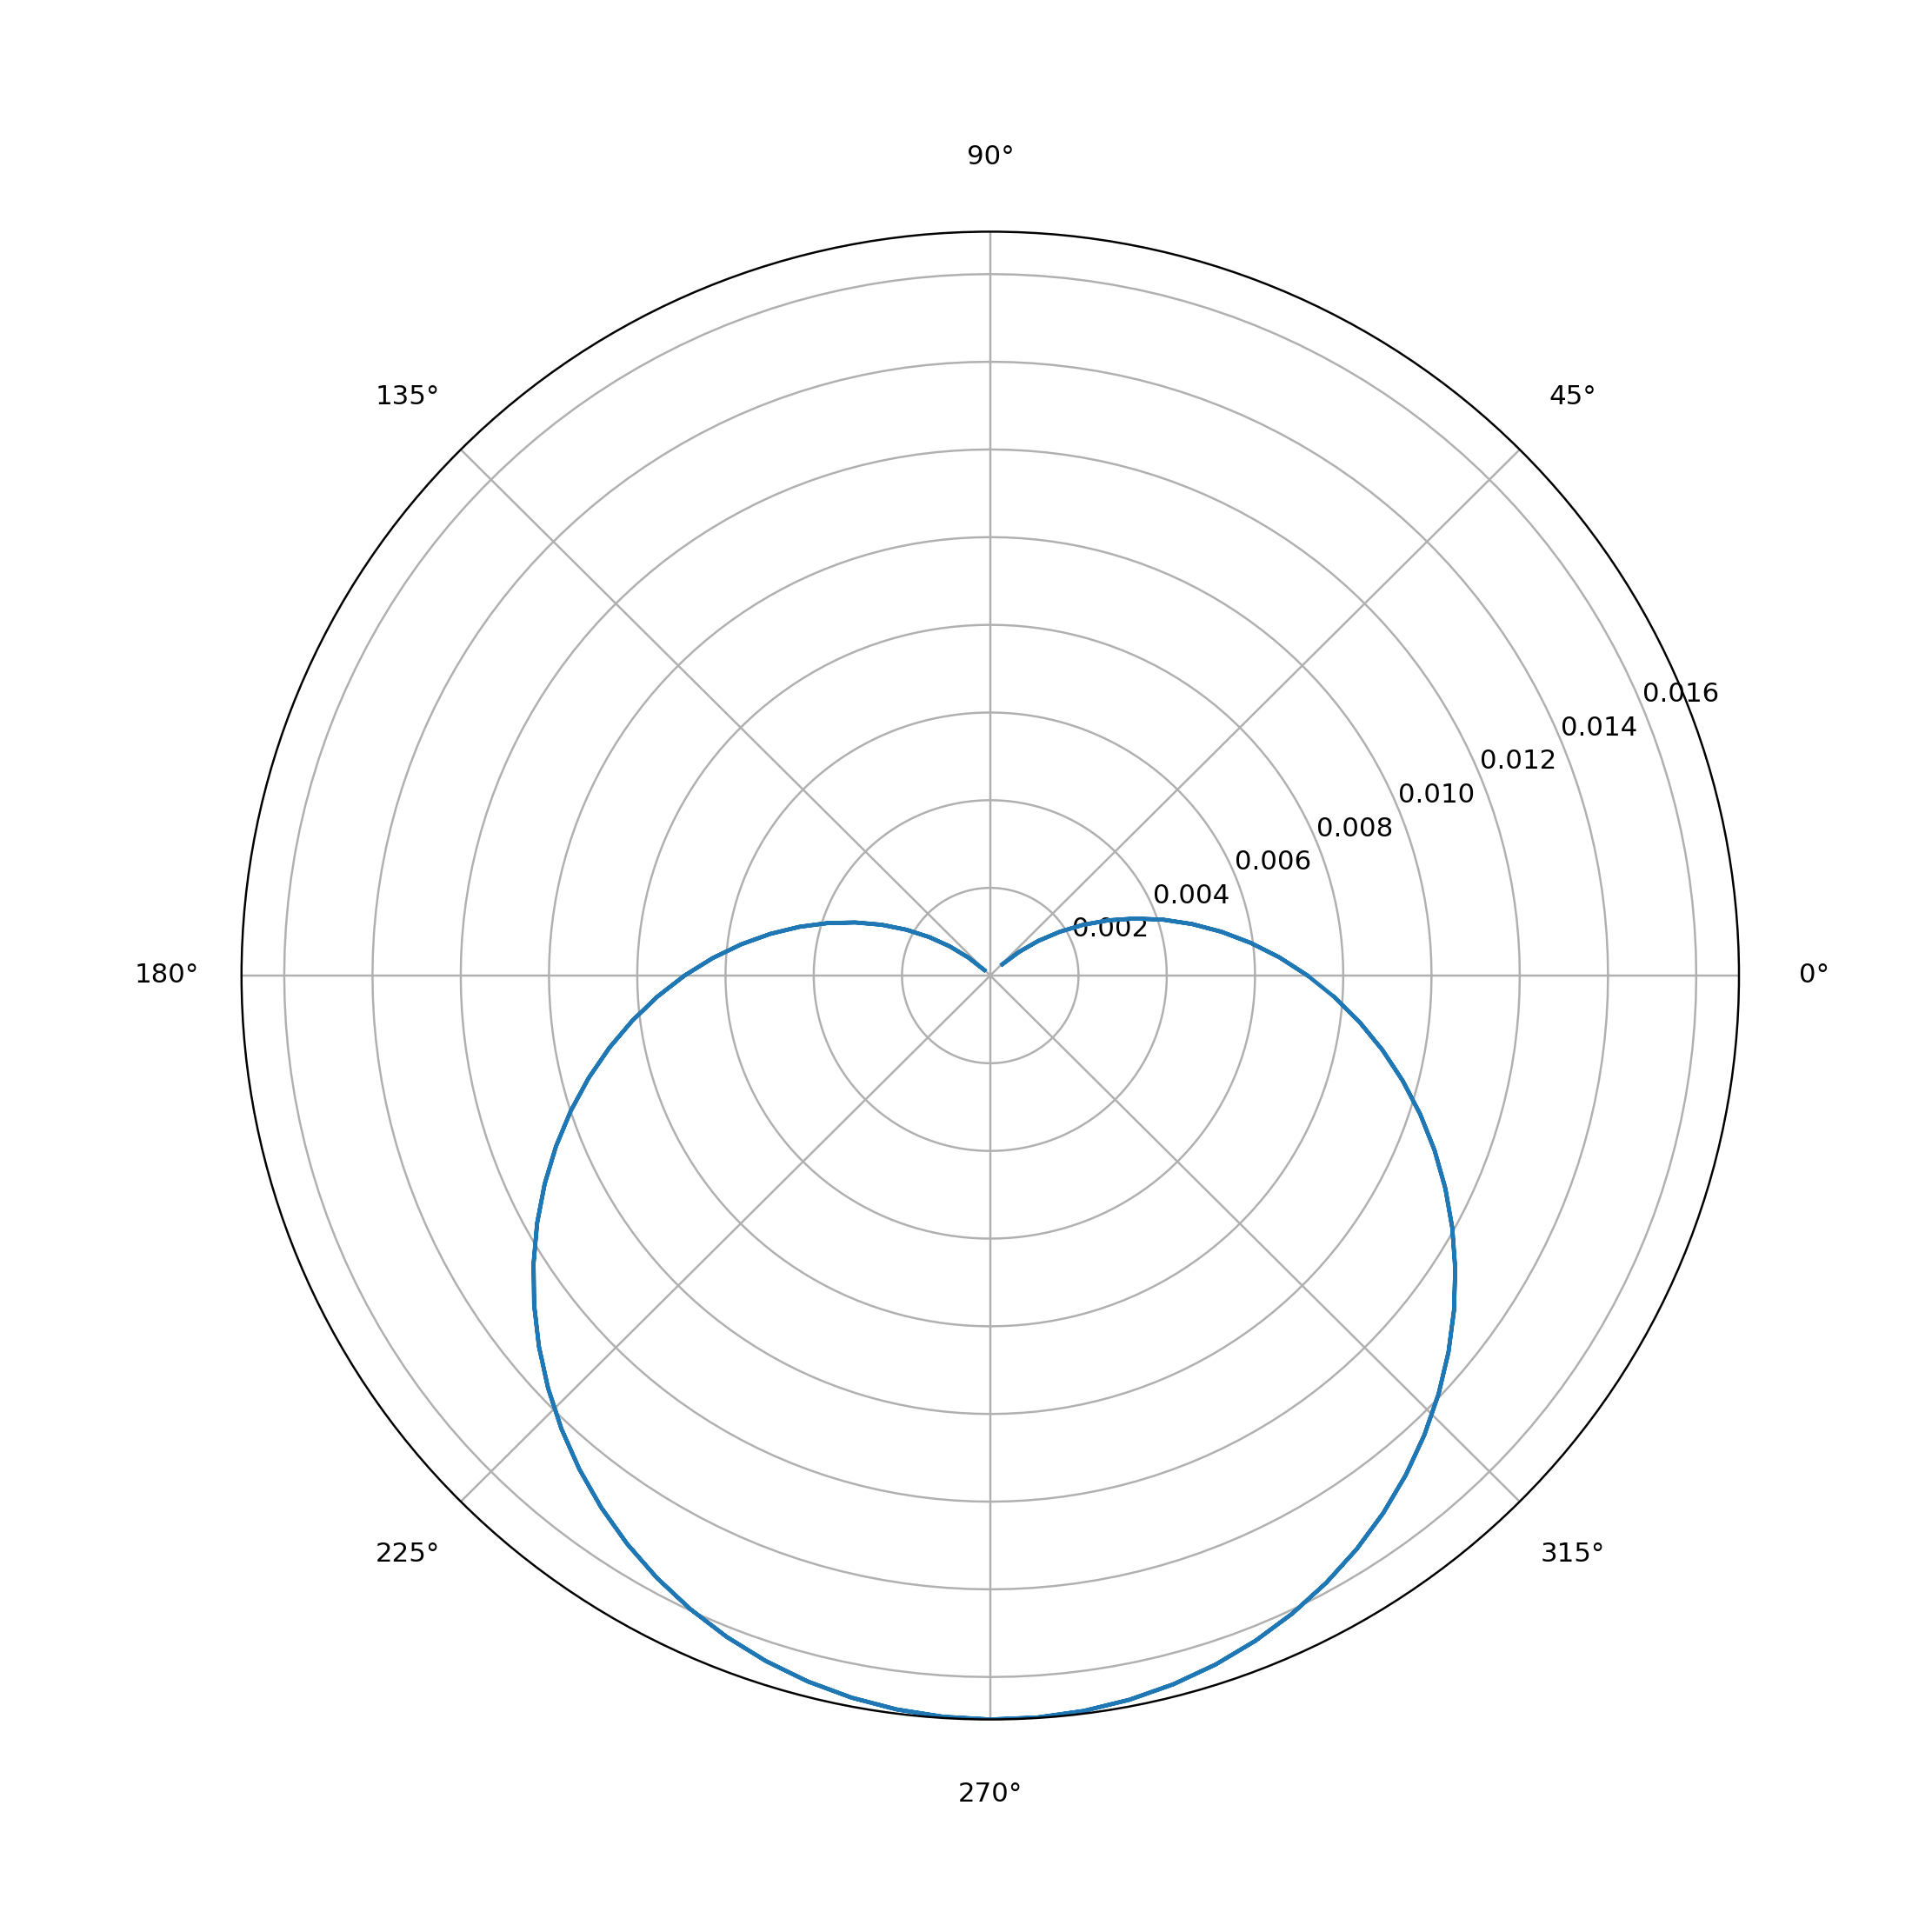

(0.0250280877164+0j)
(0.000190552324888-0.0143384670955j)
0.0
(-0.000190552324888-0.0143384670955j)


In [8]:
L = problem["L"]
pWS = np.array([3.5, 2.8])

#'''
fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(111, projection='polar')
plot_view = ax.plot(np.zeros((1)))[0]
ax.set(adjustable="datalim")
#ax.set_rticks([0.5, 1])  # less radial ticks

plot_y = np.arange(0, 2, 0.01)
plot_x = 2 * np.pi * plot_y
L.check(pWS)
for i in range(plot_x.shape[0]):
    phi = plot_x[i]
    omega = shtools.sphericalDirection(np.pi*0.5, phi)
    value = L(pWS, omega)
    plot_y[i] = np.real(value)
    #print(value)
    
ax.set_rmax(np.max(plot_y))

plot_view.set_data(plot_x, plot_y)
plt.show()

In [11]:



data_test = {}
data_test["x_real"] = data["x_real"]
data_test["x_complex"] = x_complex
scipy.io.savemat("C:/projects/epfl/epfl17/python/debug_working.mat", data_test)

In [12]:
print(data["x_real"].shape)

(14700,)
